---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    
    fraud = df['Class'][df['Class'] == 1]
    nofraud = df['Class'][df['Class'] == 0]
    
    return len(fraud) / len(df)

answer_one()


0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score

    dummyclf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    predict_y = dummyclf.predict(X_test)
    
    accuracy = accuracy_score(predict_y, y_test)
    recall = recall_score(predict_y, y_test)
    
    return (accuracy, recall)

answer_two()
    

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    
    svcclf = SVC().fit(X_train, y_train)
    
    y_pred = svcclf.predict(X_test)  # Obtain predicted labels for X_test

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, recall, precision

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
        
    svcclf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    
    #to get the scores based on threshold value of -220
    threshold = -220
    y_score = svcclf.decision_function(X_test) > threshold
    
    matrix = confusion_matrix(y_test, y_score)
    
    return matrix

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [7]:
np.random.seed(0)
l = np.random.randn(10)
l = list(l)

(0.825, 0.925)

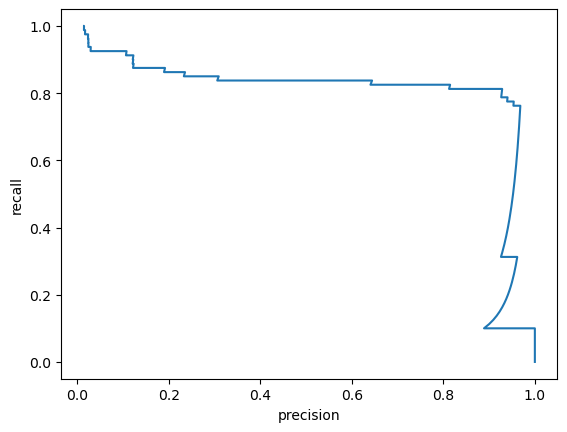

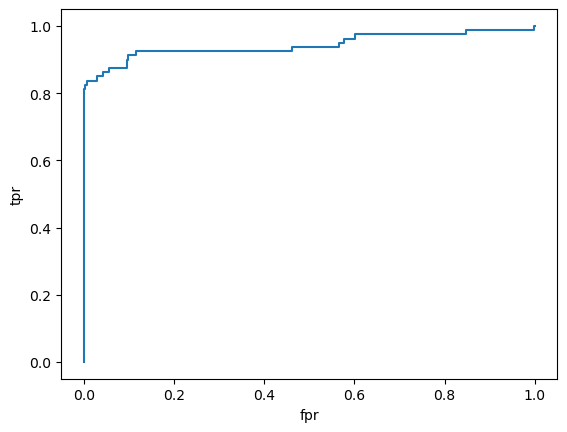

In [8]:
def answer_five() : 
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt

    
    lr = LogisticRegression().fit(X_train, y_train)
    y_predict = lr.decision_function(X_test)
    
    precision, recall, threshold = precision_recall_curve(y_test, y_predict)
    rec = recall[list(precision).index(0.75)]
    
    plt.plot(precision, recall)
    plt.xlabel('precision')
    plt.ylabel('recall')
    
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict)
    # tpr = tpr_lr[list(fpr_lr).index(0.16)]
    diff_nearest = min([abs(float(x)-0.16) for x in fpr_lr])
    fpr_nearest = 0.16 - diff_nearest # the value 0.16 is not in fpr, therefore, we need to find the NEAREST value to 0.16
    tpr = tpr_lr[list(fpr_lr).index(fpr_nearest)]
    
    plt.figure()
    plt.plot(fpr_lr, tpr_lr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

    return rec, tpr
    

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [34]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

lr = LogisticRegression(solver = 'liblinear')
grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'recall')

grid_lr.fit(X_train, y_train)

dft = pd.DataFrame()

dft['l2'] = [grid_lr.cv_results_['mean_test_score'][i] for i in range(1,9,2)]
dft['l1'] = [grid_lr.cv_results_['mean_test_score'][i] for i in range(0,8,2)]

dft = dft[['l1', 'l2']]
np.array(dft).reshape(4,2)

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

In [36]:
grid_lr.cv_results_['mean_test_score'].reshape(4,2)

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

In [42]:
def answer_six():    
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

    lr = LogisticRegression(solver = 'liblinear')
    grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'recall', cv=5)
    
    grid_lr.fit(X, y)
    
    #df = pd.DataFrame()

    #dft['l1'] = [grid_lr.cv_results_['mean_test_score'][i] for i in range(0,8,2)]
    #dft['l2'] = [grid_lr.cv_results_['mean_test_score'][i] for i in range(1,9,2)]
    #np.array(dft).reshape(4,2) THIS IS A LONGER WAY TO DO IT.
    
    return grid_lr.cv_results_['mean_test_score'].reshape(4,2)
    
answer_six()

array([[0.6965532 , 0.75843897],
       [0.79212363, 0.80055073],
       [0.80337559, 0.80337559],
       [0.79492475, 0.80057447]])

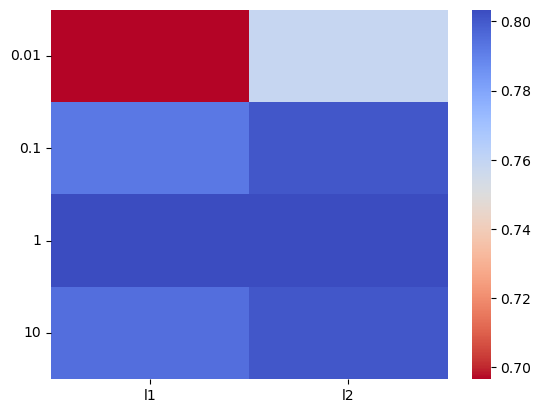

In [44]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10], cmap='coolwarm_r', )
    plt.yticks(rotation=0);
    
    return plt.show()


GridSearch_Heatmap(answer_six())